In [ ]:
%load_ext autoreload
%autoreload 2


In [1]:
import os
os.chdir("..")


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.typing import NDArray


In [24]:
from qml.model.gate import get_gateset, Gate, GateInfo
from qml.model.unit import Unit, EmbedUnit, EntangleUnit
from qml.model.model import Model
from qml.tools.trainer import calc_gradients
from qml.tools.dataloader import DataLoader
from qml.tools.evaluator import Evaluator
from qml.tools.dataset import generate_dataset
from qml.tools.pattern import ErrorPattern, ErrorPatternEvaluator
from qml.tools.wavelet import Haar, WaveletTransform
from qml.optimizer.localsearch import LocalSearchOptimizer


## Hyper parameters

In [16]:
# circuit
nq = 2
ng = 3
num_trial_unit = 9

# dataset
nx = 1
ny = 1
num_train_data = 20
num_test_data = 20
gateset = get_gateset(nq)

# optimization
shots = 50
num_iter =  100
variance = 0.3


## Dataset

In [6]:
target_func = lambda x: np.sin(np.pi * x)


In [8]:
train_data = generate_dataset(num_train_data, target_func)
test_data  = generate_dataset(num_test_data,  target_func)


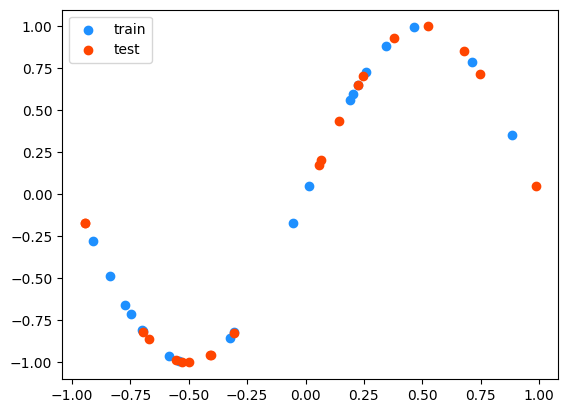

In [10]:
fig, ax = plt.subplots()
ax.scatter(*train_data.data, c="dodgerblue", label="train")
ax.scatter(*test_data.data, c="orangered", label="test")
plt.legend()


## Optimizer

In [14]:
# optimizer
optim = LocalSearchOptimizer(train_data, test_data, shots=shots, variance=variance)

# embedding unit
embu = EmbedUnit.generate_ry_arcsin_embed_unit("uemb", nq, nx, gateset=gateset)


## Training

### Round=0　pre-trained

#### Prepare evaluators

In [26]:
# Error pattern evaluator
ep_evaluator = ErrorPatternEvaluator(train_data.xs, train_data.ys, None, shots=shots)

# Wavelet
wavelet = Haar()
wtrans = WaveletTransform(wavelet)


In [29]:
# Calc error pattern
model0 = Model(nq, ny, embu, [], [], shots=shots)
ep0 = ep_evaluator([], model0)
epower = wtrans.transform(ep0.xs, ep0.es)
print(epower)


[ 6.32164880e-01  7.77863198e-01 -6.61710248e-01  7.66066522e-01
 -4.32068361e-01 -1.65449223e-01 -1.72832800e-01  2.98165663e-01
  4.87050340e-01 -4.29862556e-01 -2.38362164e-01  9.34593897e-02
 -1.82537150e-01 -3.07725854e-02 -3.40168973e-04]


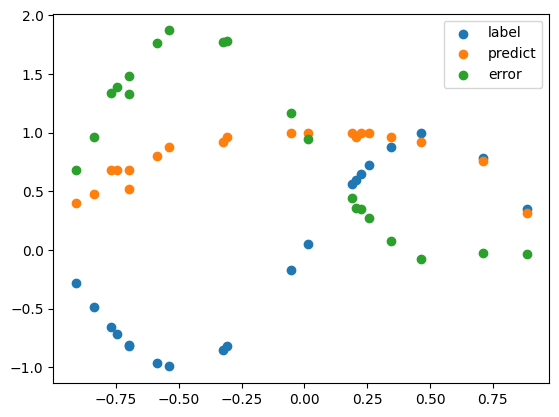

In [30]:
plt.scatter(ep0.xs, ep0.ys, label="label")
plt.scatter(ep0.xs, ep0.ps, label="predict")
plt.scatter(ep0.xs, ep0.es, label="error")
plt.legend()
plt.show()


### Round=1

In [ ]:
tr1us = [
    Unit.generate_random_unit()
]


In [35]:
gatelist = "rx,ry,rz,cz,0,1,2,0"


In [43]:
np.asarray(gatelist.split(",")).reshape((2, 4))


array([['rx', 'ry', 'rz', 'cz'],
       ['0', '1', '2', '0']], dtype='<U2')